Deep Learning activation functions examined below: 
1. ReLU
2. Leaky ReLU
3. sigmoid
4. tanh

### Activation plotting pleminaries

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Create array of possible z values
z = np.linspace(-5,5,num=1000)

def draw_activation_plot(a,quadrants=2,y_ticks=[0],two_quad_y_lim=[0,5], four_quad_y_lim=[-1,1]): 
    """
    Draws plot of activation function
   
    Parameters
    ----------
    a : Output of activation function over domain z.
    
    quadrants: The number of quadrants in the plot (options: 2 or 4)
    
    y_ticks: Ticks to show on the y-axis.
    
    two_quad_y_lim: The limit of the y axis for 2 quadrant plots.
    
    four_quad_y_lim: The limit of the y axis for 4 quadrant plots.
    
    """
    #Create figure and axis
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    #Move left axis  
    ax.spines['left'].set_position('center')
    
    #Remove top and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    #Set x and y labels
    plt.xlabel('z')
    plt.ylabel('a')
    
    #Set ticks
    plt.xticks([])
    plt.yticks(y_ticks)
    
    #Set ylim
    plt.ylim(two_quad_y_lim)
    
    #4 Quadrant conditions
    if quadrants==4:
        #Move up bottom axis
        ax.spines['bottom'].set_position('center')
        
        #Move x and y labels for readability
        ax.yaxis.set_label_coords(.48,.75)
        ax.xaxis.set_label_coords(.75,.48)
        
        ##Set y_lim for 4 quadrant graphs
        plt.ylim(four_quad_y_lim)

    #Plot z vs. activation function
    plt.plot(z,a);

## 1. ReLU
A great default choice for hidden layers. It is frequently used in industry and is almost always adequete to solve a problem.

Although this graph is not differentiable at z=0, it is not usually a problem in practice since an exact value of 0 is rare. The derivative at z=0 can usually be set to 0 or 1 without a problem.

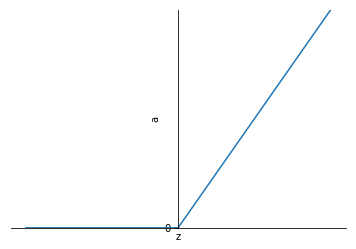

In [2]:
relu = np.maximum(z,0)

draw_activation_plot(relu)

## 2. Leaky ReLU
Can be better than ReLU, but it is used less often in practice. 

It provides a differentiable point at 0 to address the concern mentioned above.

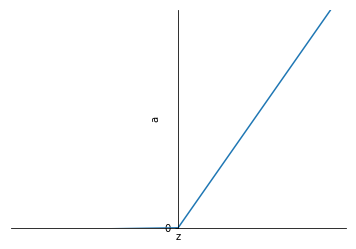

In [3]:
leaky_ReLU = np.maximum(0.01*z,z)

draw_activation_plot(leaky_ReLU)

## 3. sigmoid 
Almost never used except in output layer when dealing with binary classification. It's most useful feature is that it guarentees an output between 0 and 1.

However, when z is very small or very large, the derivative of the sigmoid function is very small which can slow down gradient descent.

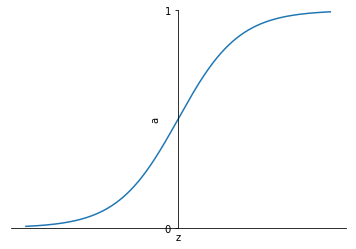

In [4]:
sigmoid = 1/(1+np.exp(-z))

draw_activation_plot(sigmoid,y_ticks=[0,1], two_quad_y_lim=[0,1])

## 4. tanh
This is essentially a shifted version of the sigmoid function which is usually strictly better. The mean of activations is closer to 0 which makes training on centered data easier. tanh is also a great default choice for hidden layers.

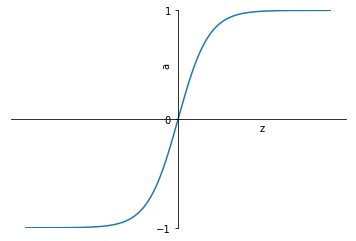

In [5]:
tanh = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

draw_activation_plot(tanh,y_ticks=[-1,0,1],quadrants=4)